# Student Performance Analysis using Logistic Regression and Decision Tree

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

### Examining Data

In [3]:
data.shape

(1000, 8)

In [4]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
438,male,group C,high school,standard,none,70,56,51


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for missing values

In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Descriptive Statistics for Numerical Columns

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Descriptive Statistics for Categorical Columns

In [11]:
data.describe(include = 'object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### Univariate Analysis

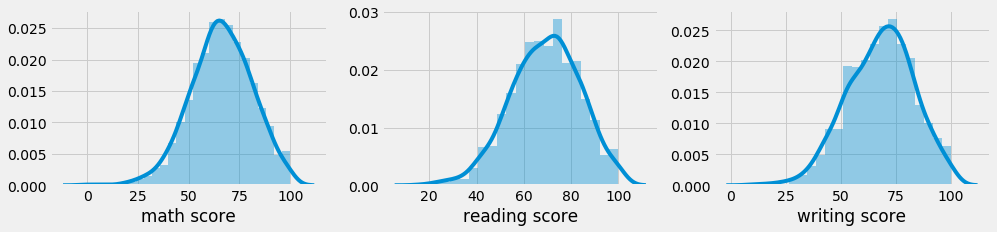

In [12]:
plt.rcParams['figure.figsize'] = (15,3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.show()

### Bivariate Analysis

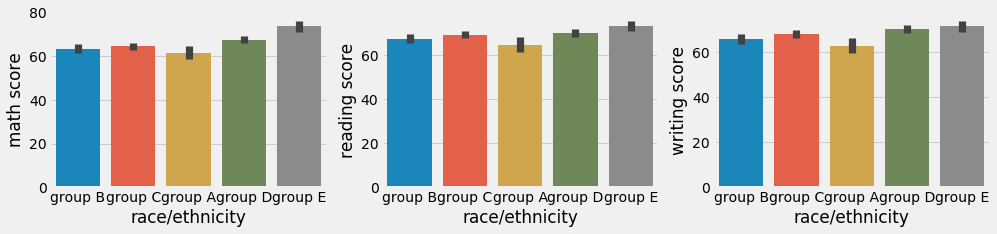

In [13]:
plt.rcParams['figure.figsize'] = (15,3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.barplot(data['race/ethnicity'], data['math score'])

plt.subplot(1, 3, 2)
sns.barplot(data['race/ethnicity'], data['reading score'])

plt.subplot(1, 3, 3)
sns.barplot(data['race/ethnicity'], data['writing score'])

plt.show()

### Multivariate Analysis

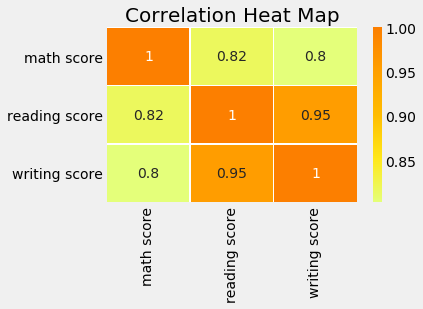

In [14]:
plt.rcParams['figure.figsize'] = (5,3)
sns.heatmap(data.corr(), annot=True, linewidth=0.5, cmap='Wistia')
plt.title('Correlation Heat Map', fontsize=20)
plt.show()

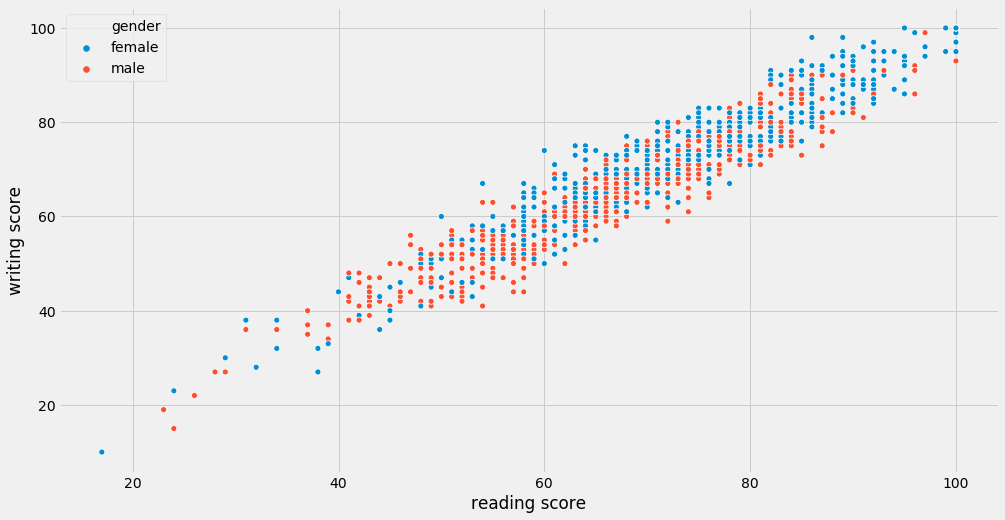

In [15]:
plt.rcParams['figure.figsize'] = (15,8)
sns.scatterplot(data['reading score'], data['writing score'], hue = data['gender'])

plt.show()

In [16]:
data[['gender','math score','reading score','writing score']].groupby(['gender']).agg('mean')

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### Feature Engineering

In [17]:
data['total marks'] = data['reading score']+data['writing score']+data['math score']
data['percentage'] = round(data['total marks']/3,2)

In [18]:
def getgrade(percentage):
    if(percentage>=90):
        return 'S'
    if(percentage>=80):
        return 'A'
    if(percentage>=70):
        return 'B'
    if(percentage>=60):
        return 'C'
    if(percentage>=50):
        return 'D'
    if(percentage>=40):
        return 'E'
    else:
        return 'F'
    
data['grades'] = data['percentage'].apply(getgrade)

In [19]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,B
1,female,group C,some college,standard,completed,69,90,88,247,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,S
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,E
4,male,group C,some college,standard,none,76,78,75,229,76.33,B


In [20]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total marks', 'percentage', 'grades'],
      dtype='object')

### Dealing with categorical columns

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['grades'] = le.fit_transform(data['grades'])

In [22]:
data.select_dtypes('object').columns

Index([], dtype='object')

### Splitting the data

In [23]:
y = data['grades']
x = data.drop(['grades'], axis=1)

print(x.shape)
print(y.shape)

(1000, 10)
(1000,)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

C:\Users\userpc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


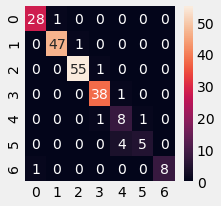

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot=True)
plt.show()

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

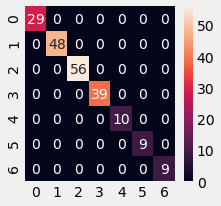

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot=True)
plt.show()

## END !!!